In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

C:\Users\Shiva\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

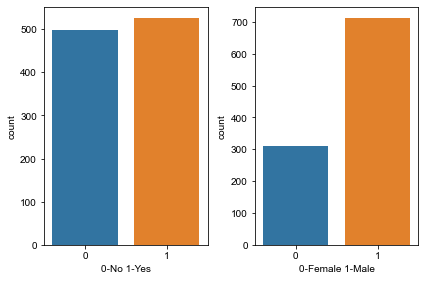

In [6]:
plt.subplot(1,2,1)
sn.countplot(df['target'])
plt.xlabel('0-No 1-Yes')
plt.subplot(1,2,2)
sn.countplot(df['sex'])
plt.xlabel('0-Female 1-Male')
sn.set_context('paper')
sn.set_style('dark')
plt.tight_layout()
plt.show()

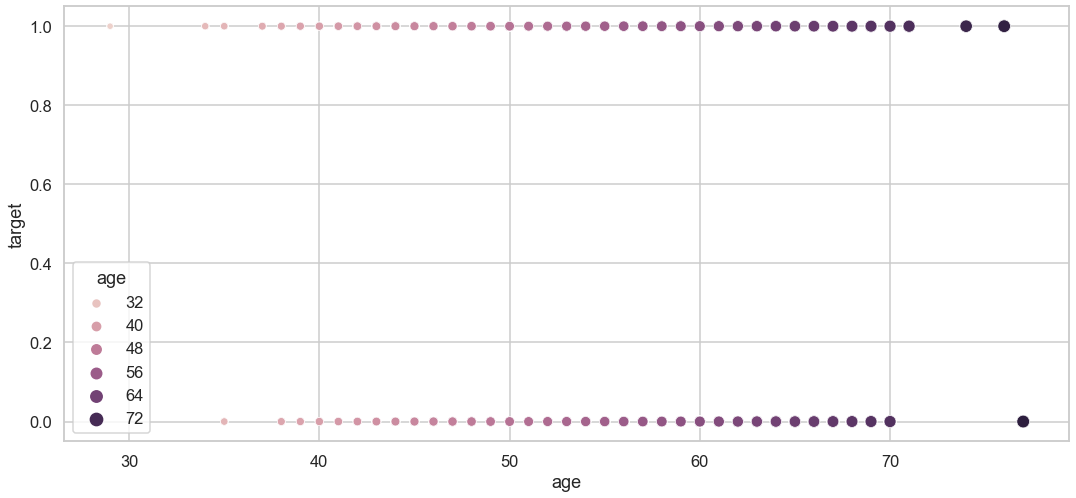

In [22]:
plt.figure(figsize=(18,8))
sn.scatterplot(data=df,x='age',y='target',hue='age',size='age')
sn.set_style('darkgrid')
plt.show()

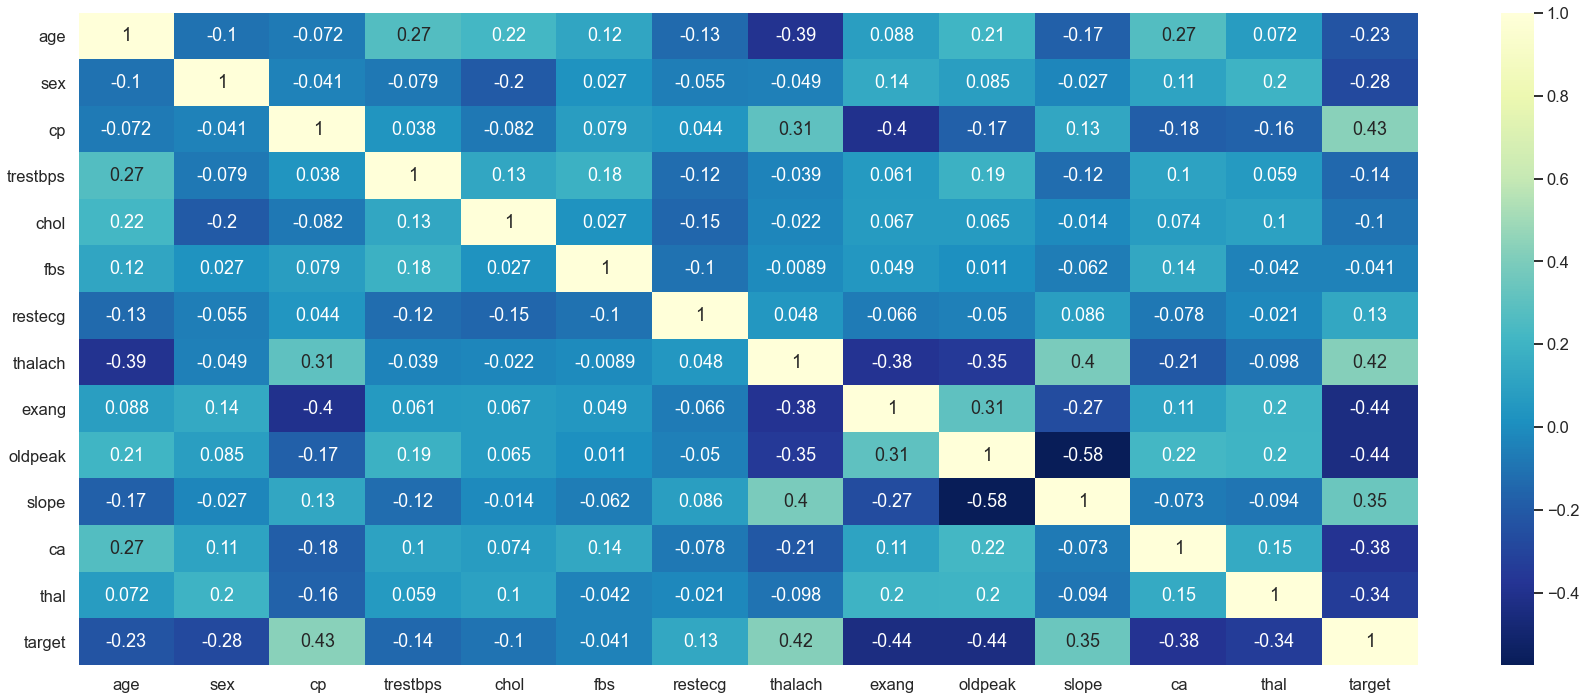

In [20]:
plt.figure(figsize=(30,12))
sn.heatmap(df.corr(),cmap="YlGnBu_r",annot=True)
plt.show()

In [9]:
x=df[['age','sex','cp','chol','slope','thal']]
y=df[['target']]

In [10]:
x.describe()

,age,sex,cp,chol,slope,thal
count,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,246.00000,1.385366,2.323902
std,9.072290,0.460373,1.029641,51.59251,0.617755,0.620660
min,29.000000,0.000000,0.000000,126.00000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,211.00000,1.000000,2.000000
50%,56.000000,1.000000,1.000000,240.00000,1.000000,2.000000
75%,61.000000,1.000000,2.000000,275.00000,2.000000,3.000000
max,77.000000,1.000000,3.000000,564.00000,2.000000,3.000000


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,r2_score,classification_report,accuracy_score

# Random-Forest Model

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
model=RandomForestClassifier(n_estimators=6,criterion='entropy',random_state=0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_pred.shape)
print(f"The Predicted Values using Random Forest Classifier :\n {y_pred}")

(717, 6)
(717, 1)
(308, 6)
(308, 1)
(308,)
The Predicted Values using Random Forest Classifier :
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1
 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1
 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0
 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1
 0 1 0 1 0 0 1 1 1 0 1 0]


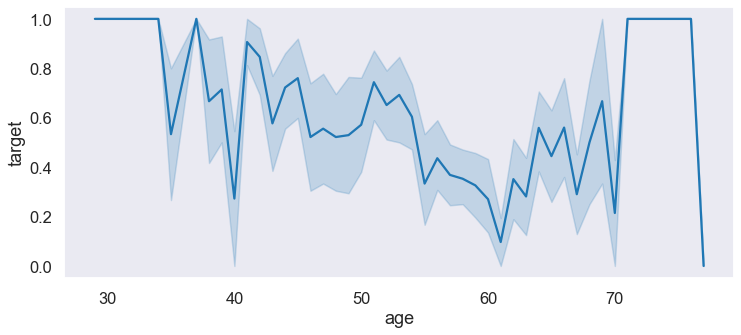

In [13]:
plt.figure(figsize=(12,5))
sn.lineplot(x=df['age'],y=df['target'])
plt.show()

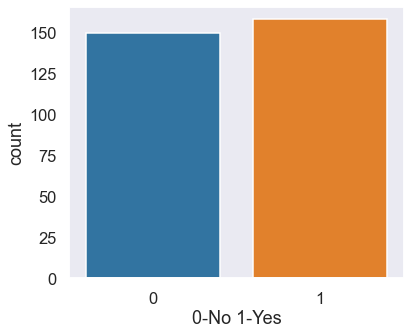

In [14]:
plt.figure(figsize=(6,5))
sn.countplot(y_pred)
plt.xlabel('0-No 1-Yes')
plt.show()

# Evaluation

In [15]:
cn=confusion_matrix(y_test,y_pred)
r2=r2_score(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
print(f"Confusion Matrix :\n {cn}")
print("R2 Score : {:.2f}".format(r2*100))
print("The Accuracy Score : {:.02f}".format(accuracy*100))
print(classification_report(y_test,y_pred))

Confusion Matrix :
 [[145   0]
 [  5 158]]
R2 Score : 93.48
The Accuracy Score : 98.38
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       145
           1       1.00      0.97      0.98       163

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



# Classification Model

In [16]:
cls_model=LogisticRegression()
cls_model.fit(x_train,y_train)
pred=cls_model.predict(x_test)
pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

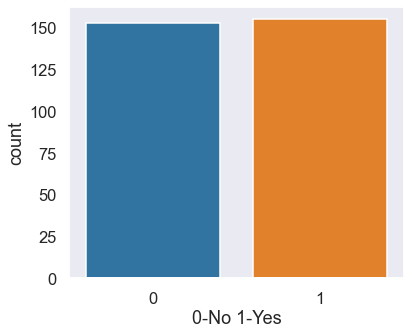

In [17]:
plt.figure(figsize=(6,5))
sn.countplot(pred)
plt.xlabel('0-No 1-Yes')
plt.show()

# Evaluation

In [18]:
cn=confusion_matrix(y_test,pred)
r2=r2_score(y_test,pred)
accuracy=accuracy_score(y_test,pred)
print(f"Confusion Matrix :\n {cn}")
print("R2 Score : {:.2f}".format(r2*100))
print("The Accuracy Score : {:.02f}".format(accuracy*100))
print(classification_report(y_test,pred))

Confusion Matrix :
 [[122  23]
 [ 31 132]]
R2 Score : 29.63
The Accuracy Score : 82.47
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       145
           1       0.85      0.81      0.83       163

    accuracy                           0.82       308
   macro avg       0.82      0.83      0.82       308
weighted avg       0.83      0.82      0.82       308

